### WEkEO Notebook - PART 3: Sea Surface Temperature Map Visualizations
#### Library imports:
######     pip install pip install cartopy
######     pip install regionmask
######     pip install pygeos

##### The Map Visualisations follow:
<ol>
<li>
CMEMS REANALYSIS: Summer Seasonal Mean SST in the Adriatic Sea,</li>

<li> 
CMEMS REANALYSIS: Winter Seasonal Mean SST in the Adriatic Sea,</li>

<li> 
CMEMS REANALYSIS: Annual Mean SST in the Adriatic Sea,</li>


</ol>


In [31]:
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import regionmask
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [32]:
t_summer = xr.open_dataset('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_2_Aggregations/WEkEO_SST_DATA/CMEMS_SST_2DSUMMER_SEASON.nc')
t_winter = xr.open_dataset('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_2_Aggregations/WEkEO_SST_DATA/CMEMS_SST_2DWINTER_SEASON.nc')
t_annual_mean = xr.open_dataset('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_2_Aggregations/WEkEO_SST_DATA/CMEMS_SST_clipped_Annual_Mean.nc')

##### File dimensions

In [33]:
t_summer,t_winter,t_annual_mean


(<xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
   * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
 Data variables:
     thetao   (year, lat, lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
   * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
 Data variables:
     thetao   (year, lat, lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lo

In [34]:
file_csv_area_1= pd.read_csv('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_2_Aggregations/WEkEO_SST_DATA/areaAdriatic.csv')


##### Summer Season Description

In [35]:
temp_summer = t_summer['thetao'][:,:,:]
temp_summer

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

##### Winter Season Description

In [36]:
temp_winter = t_winter['thetao'][:,:,:]
temp_winter

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

##### Annual Mean Description

In [37]:
temp_annual_mean = t_annual_mean['thetao'][:,:,:]
temp_annual_mean

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

##### Maximum and Minimum Temperatures

In [38]:
temp_summer_av= np.mean(temp_summer[:],axis = 0)
temp_summer_av.min(),temp_summer_av.max()

(<xarray.DataArray 'thetao' ()>
 array(20.6577, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(25.221352, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [39]:
temp_winter_av= np.mean(temp_winter[:],axis = 0)
temp_winter_av.min(),temp_winter_av.max()

(<xarray.DataArray 'thetao' ()>
 array(9.44431, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(15.3477745, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [40]:
temp_annual_mean_av= np.mean(temp_annual_mean[:],axis = 0)
temp_annual_mean_av.min(),temp_annual_mean_av.max()

(<xarray.DataArray 'thetao' ()>
 array(16.09838, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(20.021091, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [41]:
lon_name   = temp_summer.lon[:]
lat_name   = temp_summer.lat[:]

In [42]:
lon_name1   = temp_winter.lon[:]
lat_name1   = temp_winter.lat[:]

In [43]:
lon_name2   = temp_annual_mean.lon[:]
lat_name2   = temp_annual_mean.lat[:]

##### Mask area for the Adriatic Sea

In [44]:
outline_1 = np.array(file_csv_area_1)

region_area_1 = regionmask.Regions([outline_1])

In [45]:
mask_pygeos_area_1 = region_area_1.mask(t_summer.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name, lat_name)


In [46]:
mask_pygeos_area_2 = region_area_1.mask(t_winter.thetao, method="pygeos")
LON1, LAT1 = np.meshgrid(lon_name1, lat_name1)


In [47]:
mask_pygeos_area_3 = region_area_1.mask(t_annual_mean.thetao, method="pygeos")
LON2, LAT2 = np.meshgrid(lon_name2, lat_name2)


In [48]:
thetao_area_1_summer = temp_summer_av.values
thetao_area_1_summer[np.isnan(mask_pygeos_area_1)] = np.nan

In [49]:
thetao_area_1_winter = temp_winter_av.values
thetao_area_1_winter[np.isnan(mask_pygeos_area_2)] = np.nan

In [50]:
thetao_area_1_annual_mean = temp_annual_mean_av.values
thetao_area_1_annual_mean[np.isnan(mask_pygeos_area_3)] = np.nan

In [51]:
thetao_area_1_summer

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 23.820696,
        23.96131 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [52]:
thetao_area_1_winter

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 14.702645,
        14.63934 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [53]:
thetao_area_1_annual_mean

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 19.334784,
        19.379007],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

##### Plot Maps

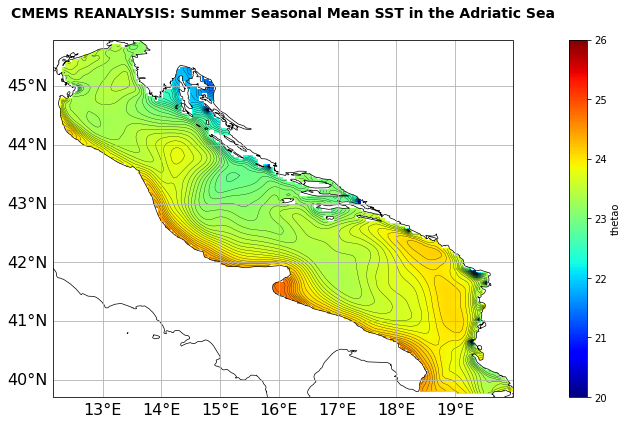

In [54]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())
temp_summer_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=True,
    vmin=20,
    vmax=26
)

lines=temp_summer_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=60)

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}


g1.xlabels_top = False
g1.ylabels_right = False
ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Summer Seasonal Mean SST in the Adriatic Sea\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/SummerSeasonalMean.png')

plt.show()

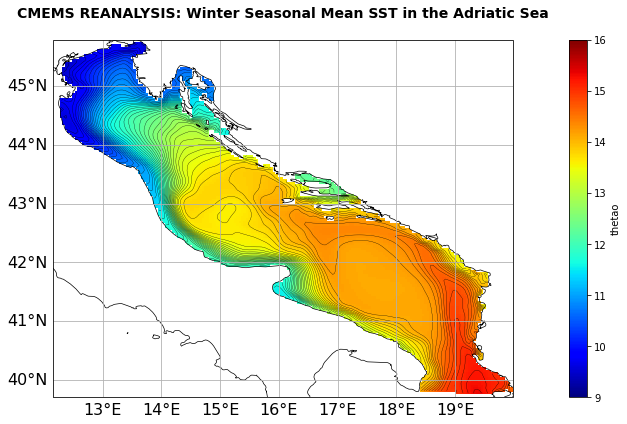

In [55]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())
temp_winter_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=True,
    vmin=9,
    vmax=16
)

lines=temp_winter_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=70)

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}


g1.xlabels_top = False
g1.ylabels_right = False
ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Winter Seasonal Mean SST in the Adriatic Sea\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/WinterSeasonalMean.png')

plt.show()

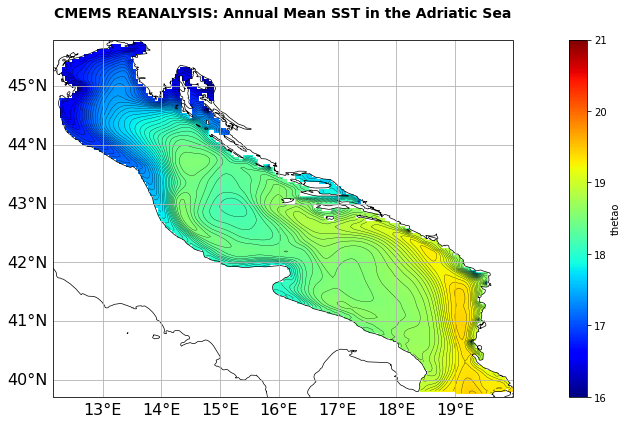

In [56]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())
temp_annual_mean_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=True,
    vmin=16,
    vmax=21
)

lines=temp_annual_mean_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=60)

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}


g1.xlabels_top = False
g1.ylabels_right = False
ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Annual Mean SST in the Adriatic Sea\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/AnnualSeasonalMean.png')

plt.show()